**This is my first Kaggle for the Titanic competition.**

The notebooks explores the basic use of Pandas and scikit-learn for this Classifcation problem.  
For more advanced approaches like using Seaborn plots, Feature Engineering, GridSearch CV  
and ML models based on stacking and voting have a look at [my second Titanic kernel](https://www.kaggle.com/dejavu23/titanic-survival-my-2nd-titanic-kernel)



**My goals for this notebook:**

* **[Part 1: Exploratory Data Analysis](#Part-1:-Exploratory-Data-Analysis)**  
understand the data by EDA and derive simple models with Pandas as baseline


* **[Part 2: Data wrangling](#Part-2:-Data-wrangling)**  
fill nan, convert categorical to numerical,  
create train and test data for ML algorithms

* **[Part 3: Scikit-learn basic ML algorithms](#Part-3:-Scikit-learn-basic-ML-algorithms-and-comparison-of-model-results)**  
implement different Classifiers from the sklearn library:  
[Logistic regression](#3.1-Logistic-Regression), [Gaussian naive Bayes](#3.2-Gaussian-Naive-Bayes), [KNN](#3.3-KNN---KNeighborsClassifier), [Decision tree](#3.4-Decision-Tree-Classifier), [Random forest](#3.5-Random-Forest-Classifier), [SVM](#3.6-SVM-Classifier)


* **[Part 3: Comparison of Model  results](#Part-3:-Scikit-learn-basic-ML-algorithms-and-comparison-of-model-results)**  
use metrics like confusion_matrix, classification_report, accuracy_score  
and implement k fold cross validation for comparison of test score
 

**References**  
**This notebook has some own approaches but is also based on these tutorials, notebooks and courses:**
* **[Datacamp: Kaggle Tutorial: EDA & Machine Learning](https://www.datacamp.com/community/tutorials/kaggle-machine-learning-eda)**
* **[Udemy: Python for Data Science and Machine Learning Bootcamp](https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/)**
* **[Data School: Machine learning in Python with scikit-learn](https://www.youtube.com/playlist?list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A)**

    


## Some Background Information


**The sinking of the RMS Titanic in the early morning of 15 April 1912, four days into the ship's maiden voyage from Southampton to New York City, was one of the deadliest peacetime maritime disasters in history, killing more than 1,500 people. The largest passenger liner in service at the time, Titanic had an estimated 2,224 people on board when she struck an iceberg in the North Atlantic. The ship had received six warnings of sea ice but was travelling at near maximum speed when the lookouts sighted the iceberg. Unable to turn quickly enough, the ship suffered a glancing blow that buckled the starboard (right) side and opened five of sixteen compartments to the sea. The disaster caused widespread outrage over the lack of lifeboats, lax regulations, and the unequal treatment of the three passenger classes during the evacuation. Inquiries recommended sweeping changes to maritime regulations, leading to the International Convention for the Safety of Life at Sea (1914), which continues to govern maritime safety.**  
*from Wikipedia*

**Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
#warnings.filterwarnings("ignore", category=DeprecationWarning)
#warnings.filterwarnings("ignore")

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))


gender_submission.csv
test.csv
train.csv



In [2]:
sns.__version__

'0.9.0'

In [3]:
df_train = pd.read_csv("../input/train.csv")
df_test = pd.read_csv("../input/test.csv")


## Part 1: Exploratory Data Analysis

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


df_train has 891 entries, some values for Cabin and Age are missing

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Also in df_test some values for Age and many values for Cabin are missing

In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Comparing distribution of features in df_train and df_test, Pclass and Age seem very similar, distributions for SibSo, Parch and Fare only slightly different

In [9]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


**Of all passengers in df_train, how many survived, how many died ?** 

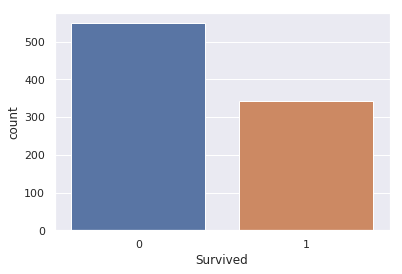

In [10]:
sns.countplot(x='Survived', data=df_train);

In [11]:
print(df_train.Survived.sum()/df_train.Survived.count())

0.3838383838383838


more people died than survived (38% survived)

-> base model : no survivors

submission : 0.627 accuracy

**Uncomment  if you want to check this submission**

In [12]:
#df_test['Survived'] = 0
#df_test[['PassengerId', 'Survived']].to_csv('no_survivors.csv', index=False)

**Sex: Female more likely to survive than male**

In [13]:
df_train.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

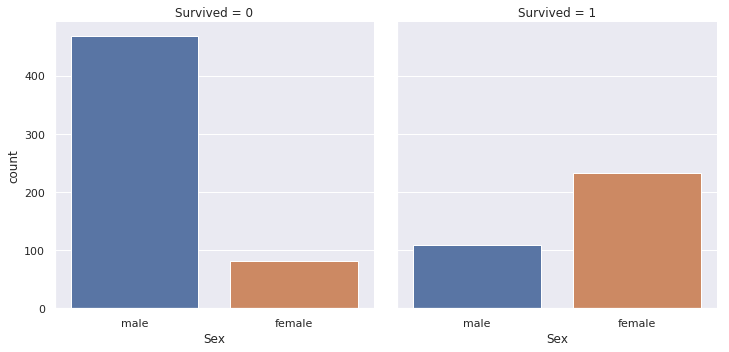

In [14]:
sns.catplot(x='Sex', col='Survived', kind='count', data=df_train);

In [15]:
print("% of women survived: " , df_train[df_train.Sex == 'female'].Survived.sum()/df_train[df_train.Sex == 'female'].Survived.count())
print("% of men survived:   " , df_train[df_train.Sex == 'male'].Survived.sum()/df_train[df_train.Sex == 'male'].Survived.count())

% of women survived:  0.7420382165605095
% of men survived:    0.18890814558058924


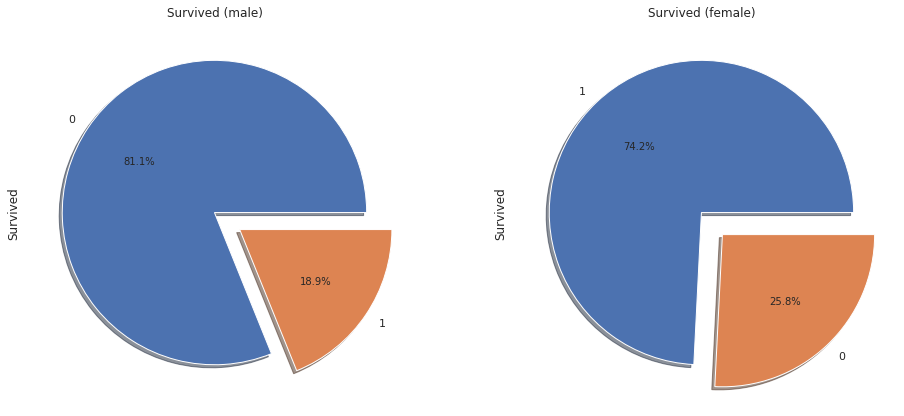

In [16]:
f,ax=plt.subplots(1,2,figsize=(16,7))
df_train['Survived'][df_train['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
df_train['Survived'][df_train['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()

Women were more likely to survive than men 

74 % of women survived
but only 19% of men
(in training set)

-> second model :
all women survived and all men died

submission : 0.766 accuracy


**Uncomment  if you want to check this submission**

In [17]:
#df_test['Survived'] = df_test.Sex == 'female'
#df_test['Survived'] = df_test.Survived.apply(lambda x: int(x))
#df_test[['PassengerId', 'Survived']].to_csv('women_survive.csv', index=False)

**Passenger Class : Survival rate decreases with Pclass**

In [18]:
pd.crosstab(df_train.Pclass, df_train.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [19]:
print("% of survivals in") 
print("Pclass=1 : ", df_train.Survived[df_train.Pclass == 1].sum()/df_train[df_train.Pclass == 1].Survived.count())
print("Pclass=2 : ", df_train.Survived[df_train.Pclass == 2].sum()/df_train[df_train.Pclass == 2].Survived.count())
print("Pclass=3 : ", df_train.Survived[df_train.Pclass == 3].sum()/df_train[df_train.Pclass == 3].Survived.count())

% of survivals in
Pclass=1 :  0.6296296296296297
Pclass=2 :  0.47282608695652173
Pclass=3 :  0.24236252545824846


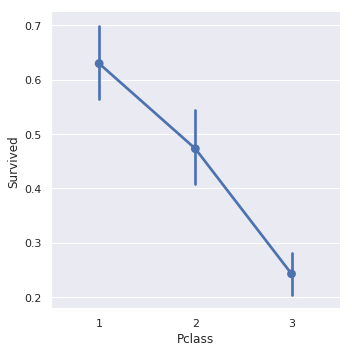

In [20]:
sns.catplot('Pclass','Survived', kind='point', data=df_train);

**Passenger Class and Sex :**

**Almost all women in Pclass 1 and 2 survived and nearly all men in Pclass 2 and 3 died**

In [21]:
pd.crosstab([df_train.Sex, df_train.Survived], df_train.Pclass, margins=True).style.background_gradient(cmap='autumn_r')

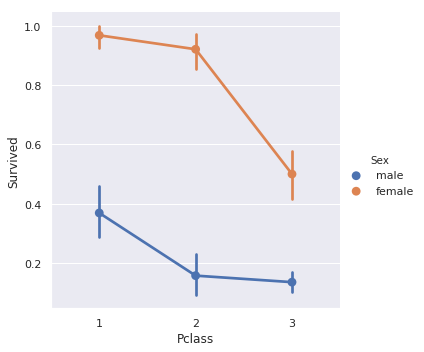

In [22]:
sns.catplot('Pclass','Survived',hue='Sex', kind='point', data=df_train);

**Embarked : Survival rate lowest for S and highest for C**

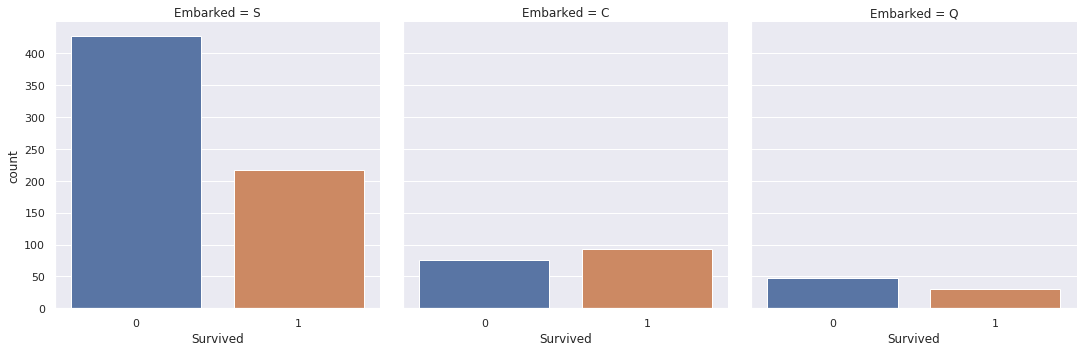

In [23]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=df_train);

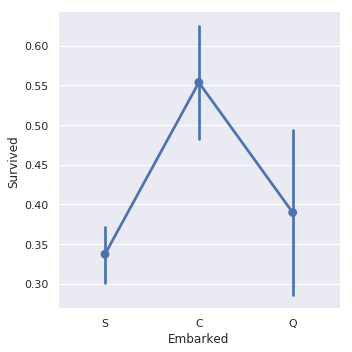

In [24]:
sns.catplot('Embarked','Survived', kind='point', data=df_train);

**Embarked and Sex**

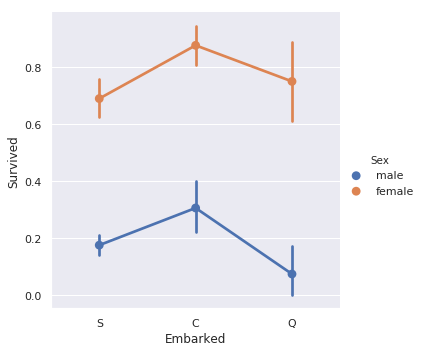

In [25]:
sns.catplot('Embarked','Survived', hue= 'Sex', kind='point', data=df_train);

**Embarked, Pclass and Sex :**

** Practically all women of Pclass 2 that embarked in C and Q survived, also nearly all women of Pclass 1 survived. **

** All men of Pclass 1 and 2 embarked in Q died, survival rate for men in Pclass 2 and 3 is always below 0.2 **

** For the remaining men in Pclass 1 that embarked in S and Q, survival rate is approx. 0.4 **

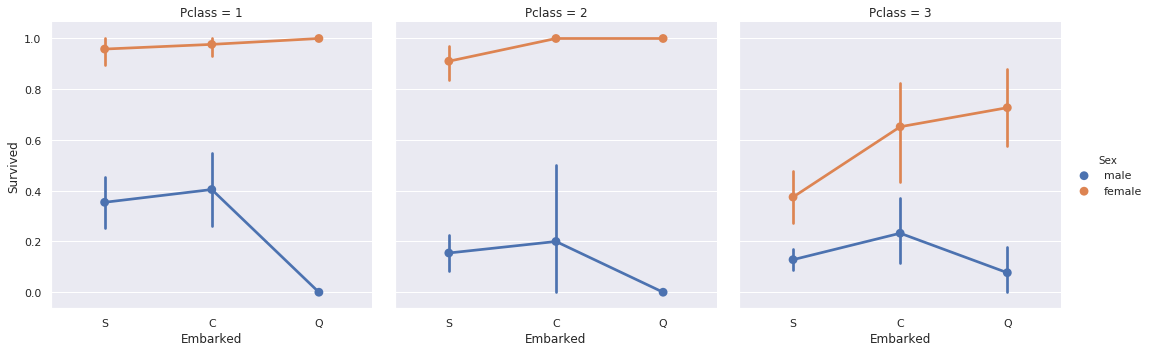

In [26]:
sns.catplot('Embarked','Survived', col='Pclass', hue= 'Sex', kind='point', data=df_train);

In [27]:
pd.crosstab([df_train.Survived], [df_train.Sex, df_train.Pclass, df_train.Embarked], margins=True)

Sex      female                          ...  male                          All
Pclass        1         2          3     ...     1   2          3              
Embarked      C  Q   S  C  Q   S   C   Q ...     S   C  Q   S   C   Q    S     
Survived                                 ...                                   
0             1  0   2  0  0   6   8   9 ...    51   8  1  82  33  36  231  549
1            42  1  46  7  2  61  15  24 ...    28   2  0  15  10   3   34  340
All          43  1  48  7  2  67  23  33 ...    79  10  1  97  43  39  265  889

[3 rows x 19 columns]

third model :
based on PClass, Sex and Embarked ,
submission : 0.779 accuracy

In [28]:
# model 3
df_test['Survived'] = 0
# all women survived
df_test.loc[ (df_test.Sex == 'female'), 'Survived'] = 1
# except for those in Pclass 3 and embarked in S
df_test.loc[ (df_test.Sex == 'female') & (df_test.Pclass == 3) & (df_test.Embarked == 'S') , 'Survived'] = 0
#df_test[['PassengerId', 'Survived']].to_csv('embarked_pclass_sex.csv', index=False)

**Age:  continuous numerical  to  8 bins **

In [29]:
for df in [df_train, df_test]:
    df['Age_bin']=np.nan
    for i in range(8,0,-1):
        df.loc[ df['Age'] <= i*10, 'Age_bin'] = i

In [30]:
print(df_train[['Age' , 'Age_bin']].head(10))

    Age  Age_bin
0  22.0      3.0
1  38.0      4.0
2  26.0      3.0
3  35.0      4.0
4  35.0      4.0
5   NaN      NaN
6  54.0      6.0
7   2.0      1.0
8  27.0      3.0
9  14.0      2.0


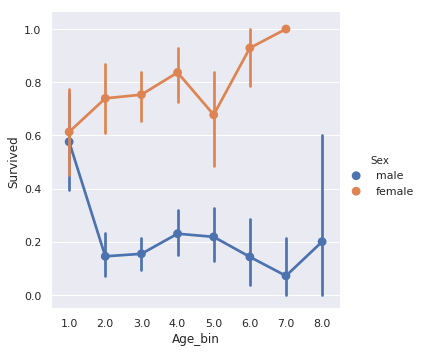

In [31]:
sns.catplot('Age_bin','Survived',hue='Sex',kind='point',data=df_train);

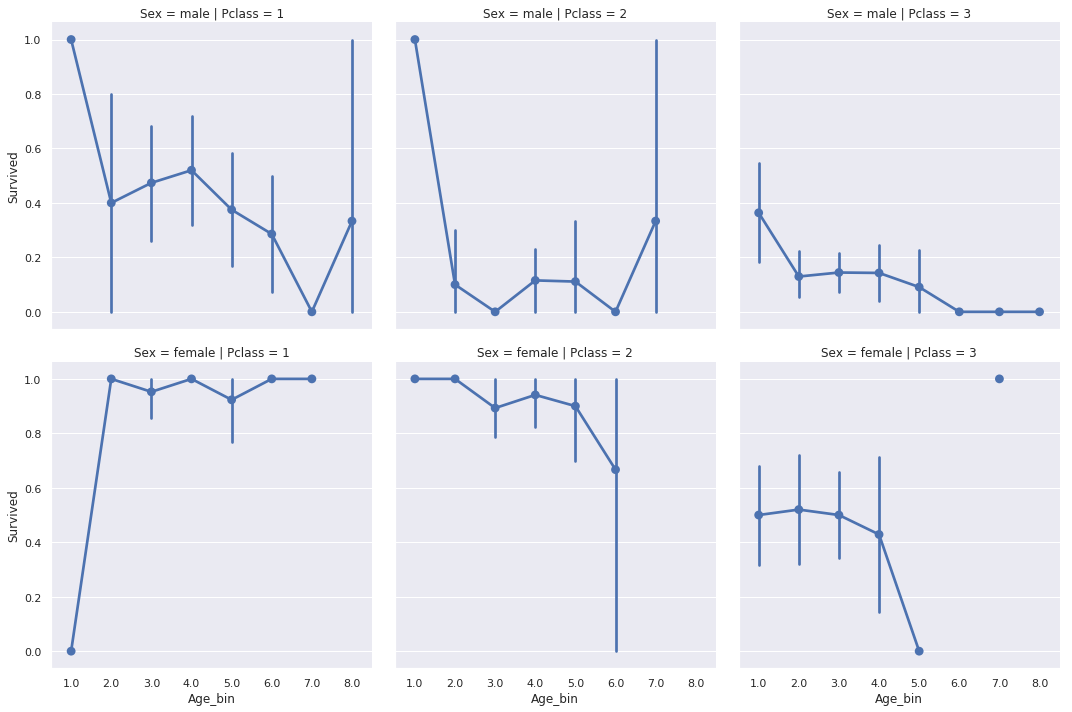

In [32]:
sns.catplot('Age_bin','Survived', col='Pclass' , row = 'Sex', kind='point', data=df_train);

In [33]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Age_bin, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

For passengers in Age_bin = 1 (younger than 10) : All male in Pclass 1 and 2 survived

All female in Pclass 3 and Age_bin = 5 died. 

(Survival rate for female in Pclass 3 and Age_bin = 4 is below 50%)

(Survival rate for male in Pclass 1 and Age_bin = 4 is above 50%)



In [34]:
# in Pclass 1 and 2 all men in Age_bin = 1 survived
df_test.loc[ (df_test.Sex == 'male') & (df_test.Pclass == 1) & (df_test.Age_bin == 1), 'Survived'] = 1
df_test.loc[ (df_test.Sex == 'male') & (df_test.Pclass == 2) & (df_test.Age_bin == 1), 'Survived'] = 1

**SibSp and Parch**

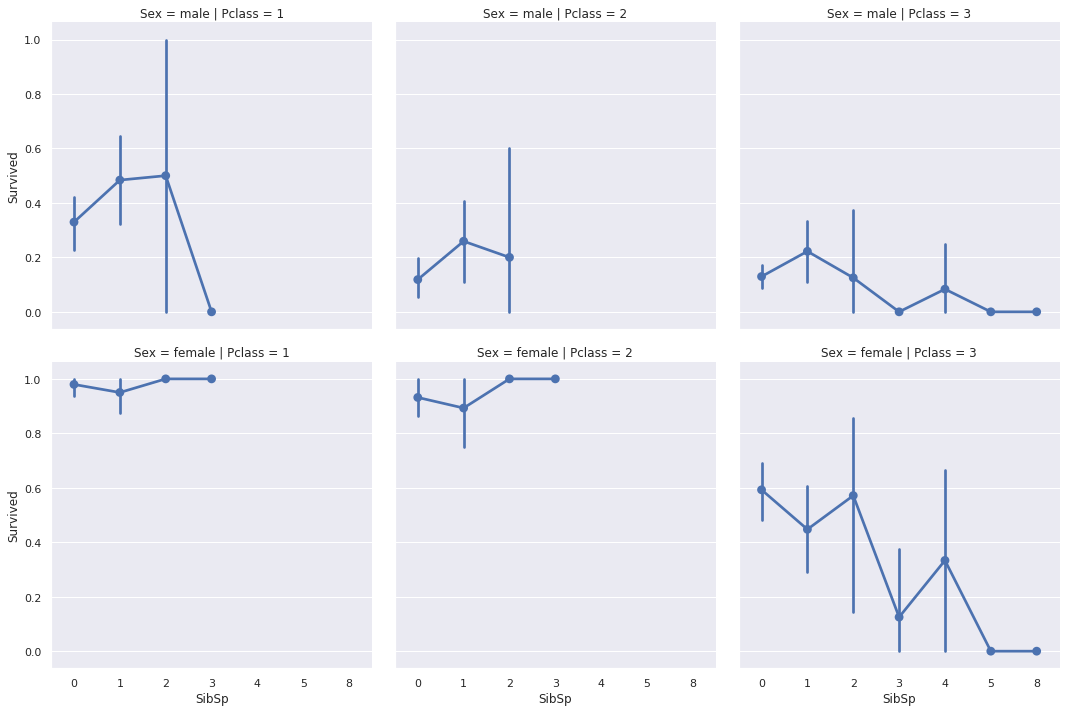

In [35]:
sns.catplot('SibSp','Survived', col='Pclass' , row = 'Sex', kind='point', data=df_train);

In [36]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.SibSp, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

For males, no survival rate above 0.5 for any values of SibSp.
For females, passengers with SibSp = 3 and Pclass = 3 died, also all females with SibSp > 4 died.
For females with SibSp = 1 and Pclass = 3 survival rate is below 0.5

In [37]:
# all females with SibSp > 7 died
df_test.loc[ (df_test.Sex == 'female') & (df_test.SibSp > 7) , 'Survived'] = 0

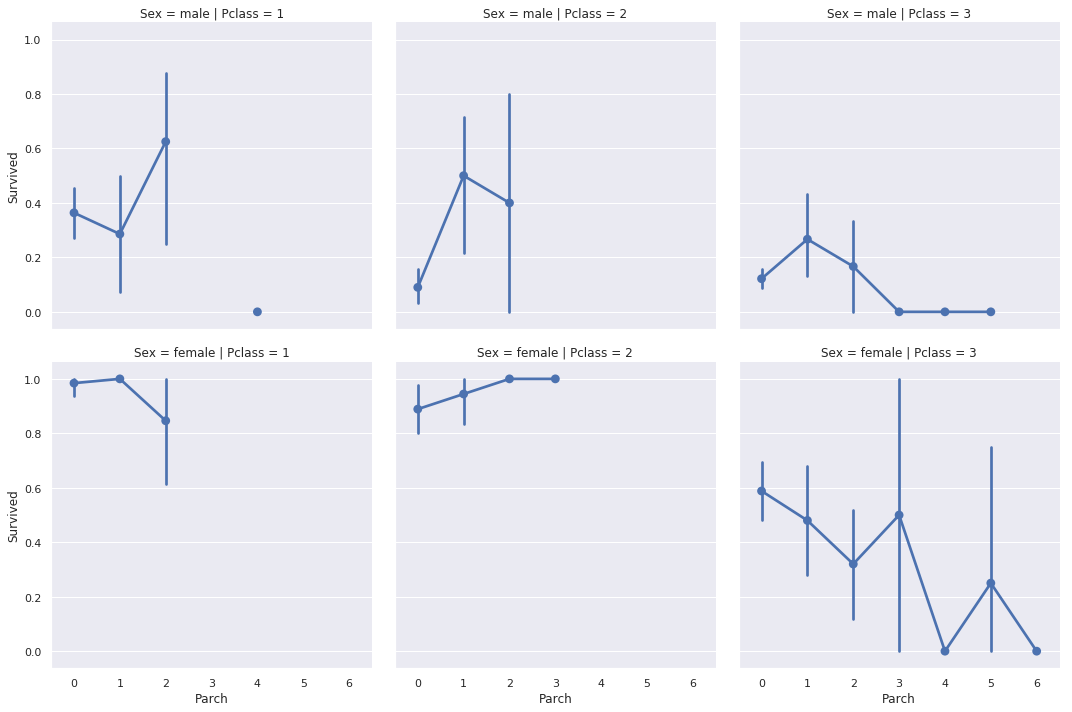

In [38]:
sns.catplot('Parch','Survived', col='Pclass' , row = 'Sex', kind='point', data=df_train);

In [39]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Parch, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

Very similar to SibSp - 1 , but different values  ?
For females with Parch = 2 and Pclass = 3 survival rate is below 0.5  
All females with Parch = 4 and Pclass = 3 died.
All females with Parch > 4 died.
(For females with Parch = 1 and Pclass = 3 survival rate is below 0.5)
For males,all survival rates below 0.5 for any values of Parch, except for Parch = 2 and Pclass = 1.

In [40]:
# survival rate is below 0.5 for females with Parch = 2 and Pclass = 3 
#df_test.loc[ (df_test.Sex == 'female') & (df_test.Pclass == 3) & (df_test.Parch == 2), 'Survived'] = 0

# All females with Parch = 4 and Pclass = 3 died
##df_test.loc[ (df_test.Sex == 'female') & (df_test.Pclass == 3) & (df_test.Parch == 4), 'Survived'] = 0

# all females with Parch > 4 died
#df_test.loc[ (df_test.Sex == 'female') & (df_test.Parch > 4) , 'Survived'] = 0

# For males with Parch = 2 and Pclass = 1 survival rate is above 0.5
##df_test.loc[ (df_test.Sex == 'male') & (df_test.Pclass == 1) & (df_test.Parch == 1) , 'Survived'] = 1

#df_test.head(20)

**Fare:  continuous numerical  to  12 bins **

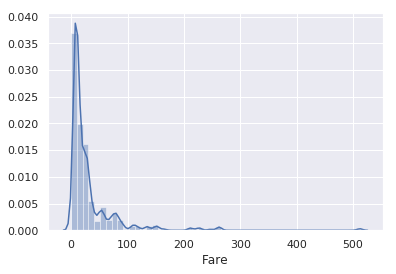

In [41]:
sns.distplot(df_train['Fare']);

In [42]:
for df in [df_train, df_test]:
    df['Fare_bin']=np.nan
    for i in range(12,0,-1):
        df.loc[ df['Fare'] <= i*50, 'Fare_bin'] = i

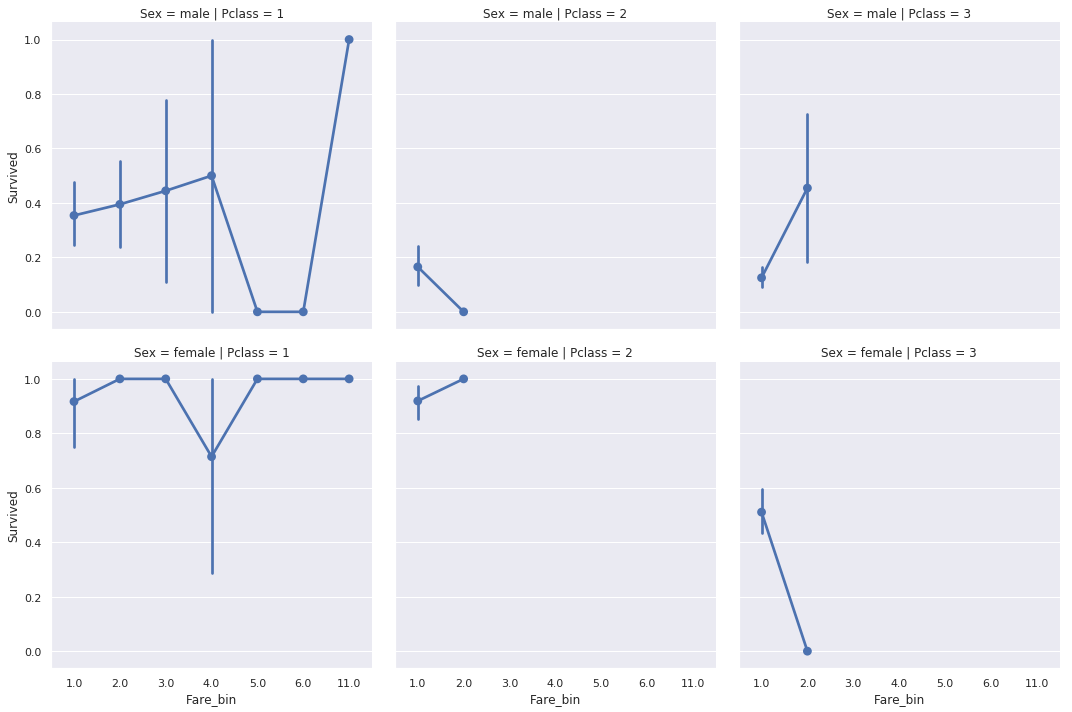

In [43]:
sns.catplot('Fare_bin','Survived', col='Pclass' , row = 'Sex', kind='point', data=df_train);

In [44]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Fare_bin, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

In [45]:
# males in Fare_bin = 11 survived
df_test.loc[ (df_test.Sex == 'male') & (df_test.Fare_bin == 11), 'Survived'] = 1

fourth model : model 3 + Age_bin, SibSp, Parch and Fare_bin  
submission : 0.789 accuracy

In [46]:
# model 4
# df_test[['PassengerId', 'Survived']].to_csv('model_4.csv', index=False)

In [47]:
df_test.drop(['Survived'],axis=1,inplace=True)


## Part 2: Data wrangling

building two new dataframes df_train_ml and df_test_ml  
these will have only ordinal features and no missing values so they can be used for ML algorithms  
converting categorical to numerical by pd.get_dummies  
dropping all features that seem to be not useful for prediction  
Then use the Standard scaler and apply train/test split

In [48]:
df_train_ml = df_train.copy()
df_test_ml = df_test.copy()

**pandas get_dummies for categorical features**

In [49]:
df_train_ml = pd.get_dummies(df_train_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
df_train_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age_bin', 'Fare_bin'],axis=1,inplace=True)
df_train_ml.dropna(inplace=True)

In [50]:
passenger_id = df_test_ml['PassengerId']
df_test_ml = pd.get_dummies(df_test_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
df_test_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age_bin', 'Fare_bin'],axis=1,inplace=True)

In [51]:
df_train_ml.head(10)

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1
6,0,54.0,0,0,51.8625,1,0,1,0,0
7,0,2.0,3,1,21.0750,1,0,1,0,1
8,1,27.0,0,2,11.1333,0,0,1,0,1
9,1,14.0,1,0,30.0708,0,0,0,1,0
10,1,4.0,1,1,16.7000,0,0,1,0,1


In [52]:
df_train_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 10 columns):
Survived      714 non-null int64
Age           714 non-null float64
SibSp         714 non-null int64
Parch         714 non-null int64
Fare          714 non-null float64
Sex_male      714 non-null uint8
Embarked_Q    714 non-null uint8
Embarked_S    714 non-null uint8
Pclass_2      714 non-null uint8
Pclass_3      714 non-null uint8
dtypes: float64(2), int64(3), uint8(5)
memory usage: 37.0 KB


In [53]:
df_test_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Age           332 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          417 non-null float64
Sex_male      418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
Pclass_2      418 non-null uint8
Pclass_3      418 non-null uint8
dtypes: float64(2), int64(2), uint8(5)
memory usage: 15.2 KB


In [54]:
df_test_ml.head(10)

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1
5,14.0,0,0,9.2250,1,0,1,0,1
6,30.0,0,0,7.6292,0,1,0,0,1
7,26.0,1,1,29.0000,1,0,1,1,0
8,18.0,0,0,7.2292,0,0,0,0,1
9,21.0,2,0,24.1500,1,0,1,0,1


**Correlation Matrix**

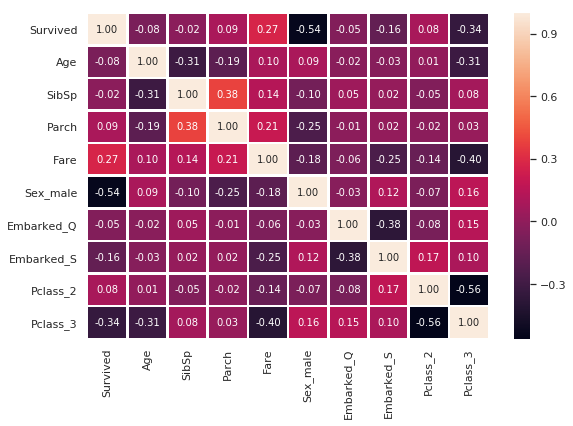

In [55]:
corr = df_train_ml.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

Survived and Fare positively correlated, Survived and Sex_male negatively correlated.  
Also, Survived and Pclass_3 negatively correlated. SibSp and Parch correlated

**sklearn StandardScaler**

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# for df_train_ml
scaler.fit(df_train_ml.drop('Survived',axis=1))
scaled_features = scaler.transform(df_train_ml.drop('Survived',axis=1))
df_train_ml_sc = pd.DataFrame(scaled_features, columns=df_train_ml.columns[:-1])

# for df_test_ml
df_test_ml.fillna(df_test_ml.mean(), inplace=True)
# scaler.fit(df_test_ml)
scaled_features = scaler.transform(df_test_ml)
df_test_ml_sc = pd.DataFrame(scaled_features, columns=df_test_ml.columns)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


**train_test_split**  
use 70% of the data for training and 30% for testing

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_ml.drop('Survived',axis=1), df_train_ml['Survived'], test_size=0.30, random_state=101)
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(df_train_ml_sc, df_train_ml['Survived'], test_size=0.30, random_state=101)

**all data for submission**

In [58]:
# unscaled
X_train_all = df_train_ml.drop('Survived',axis=1)
y_train_all = df_train_ml['Survived']
X_test_all = df_test_ml

# scaled
X_train_all_sc = df_train_ml_sc
y_train_all_sc = df_train_ml['Survived']
X_test_all_sc = df_test_ml_sc

**fillna: fill nan with mean values for that column** 

In [59]:
X_test_all.fillna(X_test_all.mean(), inplace=True)
print("*")

*


## Part 3: Scikit-learn basic ML algorithms and comparison of model results

**Test simple sklearn models and compare by metrics**


**We test the following classifiers from scikit-learn:**  
3.1 [Logistic Regression](#3.1-Logistic-Regression)  
3.2 [Gaussian Naive Bayes](#3.2-Gaussian-Naive-Bayes)  
3.3 [K nearest neighbors KNN](#3.3-KNN---KNeighborsClassifier)  
3.4 [Decision tree classifier](#3.4-Decision-Tree-Classifier)  
3.5 [Random forest classifier](#3.5-Random-Forest-Classifier)  
3.6 [SVM classifier](#3.6-SVM-Classifier)  


**First we apply the data from test/train split to get a first overview of the model performance.  
Later we use the k fold cross validation which gives a better estimate for out of sample data.**  


**For comparison of the results we use these metrics:**  
accuracy_score, classification_report, confusion_matrix


In [60]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**confusion matrix** : used to evaluate the quality of the output of a classifier.  
The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.  
*(from sklearn documentation, slightly modified)*

The rows of a confusion matrix correspond to the true (actual) classes and the columns correspond to the predicted classes.  
So, all together the confusion matrix for a **binary classifier** consists of 4 values:

TN FP  
FN TP  
      
TN: True negatives (prediction: not survived, true: not survived)  
FP: False positives (prediction: survived, true: not survived)  
FN: False negatives (prediction: not survived, true: survived)  
TP: True positives (prediction: survived, true: survived)
      
      

**accuracy score**  
classification accuracy = correct predictions / total predictions   = (TP + TN)  /  (TP + TN + FP + FN) 

**classification_report**  
*from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html* :  

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_true.

precision
recall
f1-score
support

### **3.1 Logistic Regression**  
[sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) ++ [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression) ++ [Coursera Andrew Ng](https://www.coursera.org/lecture/machine-learning/classification-wlPeP)  ++ [towardsdatascience](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc) ++ [DataCamp](https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python) ++ [hackernoon](https://hackernoon.com/introduction-to-machine-learning-algorithms-logistic-regression-cbdd82d81a36) ++ [dataaspirant](http://dataaspirant.com/2017/03/02/how-logistic-regression-model-works/)

In [61]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
pred_logreg = logreg.predict(X_test)
print(confusion_matrix(y_test, pred_logreg))
print(classification_report(y_test, pred_logreg))
print(accuracy_score(y_test, pred_logreg))

[[107  16]
 [ 32  60]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       123
           1       0.79      0.65      0.71        92

   micro avg       0.78      0.78      0.78       215
   macro avg       0.78      0.76      0.77       215
weighted avg       0.78      0.78      0.77       215

0.7767441860465116


**Train again for all data and submit**

In [62]:
logreg.fit(X_train_all, y_train_all)
pred_all_logreg = logreg.predict(X_test_all)

In [63]:
sub_logreg = pd.DataFrame()
sub_logreg['PassengerId'] = df_test['PassengerId']
sub_logreg['Survived'] = pred_all_logreg
#sub_logmodel.to_csv('logmodel.csv',index=False)

### **3.2 Gaussian Naive Bayes**  
[sklearn](https://scikit-learn.org/stable/modules/naive_bayes.html) ++ [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Gaussian_naive_Bayes) ++   [towardsdatascience](https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c) ++ [towardsdatascience](https://towardsdatascience.com/naive-bayes-in-machine-learning-f49cc8f831b4) ++ [DataCamp](https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn) ++ [dataaspirant](http://dataaspirant.com/2017/02/06/naive-bayes-classifier-machine-learning/) 



In [64]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
pred_gnb = gnb.predict(X_test)
print(confusion_matrix(y_test, pred_gnb))
print(classification_report(y_test, pred_gnb))
print(accuracy_score(y_test, pred_gnb))

[[107  16]
 [ 36  56]]
              precision    recall  f1-score   support

           0       0.75      0.87      0.80       123
           1       0.78      0.61      0.68        92

   micro avg       0.76      0.76      0.76       215
   macro avg       0.76      0.74      0.74       215
weighted avg       0.76      0.76      0.75       215

0.7581395348837209


### **3.3 KNN - KNeighborsClassifier**  
[sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) ++ [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) ++   [Medium](https://medium.com/@adi.bronshtein/a-quick-introduction-to-k-nearest-neighbors-algorithm-62214cea29c7) ++ [towardsdatascience](https://towardsdatascience.com/introduction-to-k-nearest-neighbors-3b534bb11d26) ++ [datacamp](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn) ++ [analyticsvidhya](https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/) ++ [dataaspirant](http://dataaspirant.com/2016/12/27/k-nearest-neighbor-algorithm-implementaion-python-scratch/)




In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_sc,y_train_sc)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

In [66]:
pred_knn = knn.predict(X_test)
print(confusion_matrix(y_test, pred_knn))
print(classification_report(y_test, pred_knn))
print(accuracy_score(y_test, pred_knn))

[[71 52]
 [26 66]]
              precision    recall  f1-score   support

           0       0.73      0.58      0.65       123
           1       0.56      0.72      0.63        92

   micro avg       0.64      0.64      0.64       215
   macro avg       0.65      0.65      0.64       215
weighted avg       0.66      0.64      0.64       215

0.6372093023255814


In [67]:
knn.fit(X_train_all, y_train_all)
pred_all_knn = knn.predict(X_test_all)

In [68]:
sub_knn = pd.DataFrame()
sub_knn['PassengerId'] = df_test['PassengerId']
sub_knn['Survived'] = pred_all_knn
#sub_knn.to_csv('knn.csv',index=False)

### **3.4 Decision Tree Classifier**  
[sklearn](https://scikit-learn.org/stable/modules/tree.html) ++ [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning) ++   [Medium](https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052) ++ [Medium](https://medium.com/deep-math-machine-learning-ai/chapter-4-decision-trees-algorithms-b93975f7a1f1) ++ [datacamp](https://www.datacamp.com/community/tutorials/decision-tree-classification-python) ++ [hackernoon](https://hackernoon.com/what-is-a-decision-tree-in-machine-learning-15ce51dc445d) ++ [hackerearth](https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/ml-decision-tree/tutorial/)

In [69]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [70]:
pred_dtree = dtree.predict(X_test)
print(classification_report(y_test,pred_dtree))
print(accuracy_score(y_test, pred_dtree))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       123
           1       0.75      0.66      0.71        92

   micro avg       0.76      0.76      0.76       215
   macro avg       0.76      0.75      0.75       215
weighted avg       0.76      0.76      0.76       215

0.7627906976744186


another decision tree with different parameters for max_features, max_depth and min_sample_split

In [71]:
dtree_2 = DecisionTreeClassifier(max_features=7 , max_depth=6,  min_samples_split=8)
dtree_2.fit(X_train,y_train)
pred_dtree_2 = dtree_2.predict(X_test)
print(classification_report(y_test, pred_dtree_2))
print(accuracy_score(y_test, pred_dtree_2))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       123
           1       0.81      0.70      0.75        92

   micro avg       0.80      0.80      0.80       215
   macro avg       0.80      0.79      0.79       215
weighted avg       0.80      0.80      0.80       215

0.8


all data

In [72]:
dtree_2.fit(X_train_all, y_train_all)
pred_all_dtree2 = dtree_2.predict(X_test_all)

### **3.5 Random Forest Classifier**  
[sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) ++ [Wikipedia](https://en.wikipedia.org/wiki/Random_forest) ++   [towardsdatascience](https://towardsdatascience.com/the-random-forest-algorithm-d457d499ffcd) ++ [towardsdatascience](https://towardsdatascience.com/random-forest-in-python-24d0893d51c0) ++ [datacamp](https://www.datacamp.com/community/tutorials/random-forests-classifier-python) ++ [youtube](https://www.youtube.com/watch?v=eM4uJ6XGnSM) ++ [jakevdp](https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html)

In [73]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6, max_features=7)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [74]:
pred_rfc = rfc.predict(X_test)
print(confusion_matrix(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))
print(accuracy_score(y_test, pred_rfc))

[[113  10]
 [ 32  60]]
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       123
           1       0.86      0.65      0.74        92

   micro avg       0.80      0.80      0.80       215
   macro avg       0.82      0.79      0.79       215
weighted avg       0.81      0.80      0.80       215

0.8046511627906977


**Train again for all data and submit**

In [75]:
rfc.fit(X_train_all, y_train_all)
pred_all_rfc = rfc.predict(X_test_all)

In [76]:
sub_rfc = pd.DataFrame()
sub_rfc['PassengerId'] = df_test['PassengerId']
sub_rfc['Survived'] = pred_all_rfc
#sub_rfc.to_csv('randforest.csv',index=False)

### **3.6 SVM Classifier**  
[sklearn](https://scikit-learn.org/stable/modules/svm.html) ++ [Wikipedia](https://en.wikipedia.org/wiki/Support-vector_machine) ++   [towardsdatascience](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47) ++ [datacamp](https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python) ++ [medium](https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72) ++ [youtube](https://www.youtube.com/watch?v=N1vOgolbjSc) ++ [jakevdp](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

In [77]:
from sklearn.svm import SVC
svc = SVC(gamma = 0.01, C = 100)#, probability=True)
svc.fit(X_train_sc, y_train_sc)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [78]:
pred_svc = svc.predict(X_test_sc)
print(confusion_matrix(y_test_sc, pred_svc))
print(classification_report(y_test_sc, pred_svc))
print(accuracy_score(y_test_sc, pred_svc))

[[116   7]
 [ 34  58]]
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       123
           1       0.89      0.63      0.74        92

   micro avg       0.81      0.81      0.81       215
   macro avg       0.83      0.79      0.79       215
weighted avg       0.82      0.81      0.80       215

0.8093023255813954


In [79]:
svc.fit(X_train_all_sc, y_train_all_sc)
pred_all_svc = svc.predict(X_test_all_sc)

sub_svc = pd.DataFrame()
sub_svc['PassengerId'] = df_test['PassengerId']
sub_svc['Survived'] = pred_all_svc
sub_svc.to_csv('svc.csv',index=False)

**k fold cross_validation**

This algorithm splits the data into k sets and then makes k fits using every set k-1 times as training and one time as test data  
It leads to a better estimate for out of sample data  than simple train test split

In [80]:
from sklearn.model_selection import cross_val_score

for SVM classifier

In [81]:
scores_svc = cross_val_score(svc, X_train_all_sc, y_train_all_sc, cv=10, scoring='accuracy')
print(scores_svc)
print(scores_svc.mean())

[0.81944444 0.80555556 0.76388889 0.875      0.81690141 0.8028169
 0.8028169  0.73239437 0.88732394 0.84507042]
0.8151212832550861


for Random Forest classifier

In [82]:
scores_rfc = cross_val_score(rfc, X_train_all_sc, y_train_all_sc, cv=10, scoring='accuracy')
print(scores_rfc)
print(scores_rfc.mean())

[0.79166667 0.79166667 0.75       0.90277778 0.8028169  0.81690141
 0.81690141 0.73239437 0.87323944 0.84507042]
0.8123435054773083


for DecisionTreeClassifier

In [83]:
scores_dtree_2 = cross_val_score(dtree_2, X_train_all_sc, y_train_all_sc, cv=10, scoring='accuracy')
print(scores_dtree_2)
print(scores_dtree_2.mean())

[0.72222222 0.79166667 0.76388889 0.875      0.81690141 0.76056338
 0.83098592 0.77464789 0.85915493 0.88732394]
0.808235524256651


**The Classifiers with best performance are Decision Tree, Random Forest and SVC**


In [84]:
print("dtree_2 : " , scores_dtree_2.mean())
print("rfc     : " , scores_rfc.mean())
print("svc     : " , scores_svc.mean())

dtree_2 :  0.808235524256651
rfc     :  0.8123435054773083
svc     :  0.8151212832550861


**Note on scores**

Some kernels for the Titanic competition calculate scores based on the training set. This is not a good indicator for the model performance, because we want to know how well the model generalizes for data that was not used for fitting the model. Therefore, scores in this and in my other kernels are always for out of sample test or validation data.

**Conclusion**  
With this notebook we learned the basics of EDA with Pandas and Matplotlib as well as the foundations  
for applying the classification models of the scikit learn library.  
By EDA we found a strong impact of features like Sex, Age, Embarked on the target.  
We then built a simple baseline model with Pandas, using only these features.  
Again using Pandas, we also created a dataset that can be used by the sklearn Classifiers for prediction.  
Deciding by k fold cross validation score, the best ML models for this task and set of features were:  
Decision Tree, Random Forest and SVC  
Submitting their predictions gives a score of 0,78 and a place in the top 30% of the Leaderboard.  

In [my second Titanic kernel](https://www.kaggle.com/dejavu23/titanic-survival-my-2nd-kernel) I study how to improve this score by 
* using features built from the existing ones (Feature Engineering)
* optimising the model hyper-parameters with GridSearchCV
* applying techniques like boosting, stacking and voting